In [45]:
from random import choices
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import lightgbm as lgb

In [123]:
nbpres = pd.read_excel("TimeSeries/dataset.xlsx")
nbpres

,date,presence
0,2019-09-01,153
1,2019-09-02,151
2,2019-09-03,103
3,2019-09-04,87
4,2019-09-05,170
...,...,...
1075,2022-08-11,169
1076,2022-08-12,0
1077,2022-08-13,83
1078,2022-08-14,152


In [124]:
nbpres.drop(nbpres[nbpres.presence==0].index, inplace=True)

In [3]:
for i in nbpres['Event']:
    if(i=="Normal"):
        nbpres['Event']=1
    else:
        nbpres['Event']=0

In [125]:
nbpres

,date,presence
0,2019-09-01,153
1,2019-09-02,151
2,2019-09-03,103
3,2019-09-04,87
4,2019-09-05,170
...,...,...
1074,2022-08-10,82
1075,2022-08-11,169
1077,2022-08-13,83
1078,2022-08-14,152


In [126]:
nbpres['date'] = pd.to_datetime(nbpres['date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = nbpres.set_index(['date'])
indexedDataset.head(10)

,presence
date,
2019-09-01,153
2019-09-02,151
2019-09-03,103
2019-09-04,87
2019-09-05,170
2019-09-07,89
2019-09-08,152
2019-09-09,149
2019-09-11,84


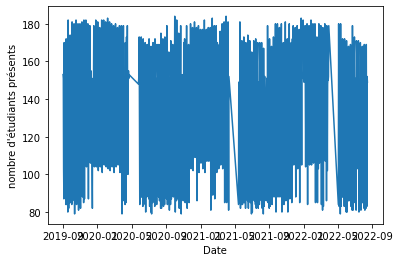

In [127]:
plt.xlabel('Date')
plt.ylabel("nombre d'étudiants présents")
plt.plot(indexedDataset.presence)

In [130]:
train = indexedDataset.presence[:]
test = indexedDataset.presence[:]

In [129]:
indexedDataset

,presence
date,
2019-09-01,153
2019-09-02,151
2019-09-03,103
2019-09-04,87
2019-09-05,170
...,...
2022-08-10,82
2022-08-11,169
2022-08-13,83


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [132]:
train = train.values.reshape(-1,1)
test = test.values.reshape(-1,1)

In [133]:
train

array([[153],
       [151],
       [103],
       [ 87],
       [170],
       [ 89],
       [152],
       [149],
       [ 84],
       [172],
       [ 84],
       [148],
       [149],
       [105],
       [ 80],
       [182],
       [ 82],
       [148],
       [148],
       [150],
       [ 85],
       [174],
       [ 85],
       [150],
       [152],
       [102],
       [ 84],
       [181],
       [ 86],
       [150],
       [148],
       [148],
       [148],
       [180],
       [ 79],
       [151],
       [154],
       [153],
       [150],
       [182],
       [ 84],
       [150],
       [150],
       [155],
       [148],
       [180],
       [ 81],
       [153],
       [151],
       [150],
       [154],
       [180],
       [ 82],
       [151],
       [151],
       [149],
       [148],
       [181],
       [ 88],
       [150],
       [148],
       [148],
       [ 85],
       [182],
       [ 87],
       [149],
       [149],
       [106],
       [149],
       [182],
       [104],
      

In [134]:
scaler.fit(train)
scaled_train_data = scaler.transform(train)
scaled_test_data = scaler.transform(test)

In [135]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [136]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [85]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time
ERROR: No matching distribution found for time


In [137]:
import time
start_time = time.perf_counter()
lstm_model.fit_generator(generator,epochs=20)
end_time = time.perf_counter()
print("temps d'éxécution", end_time - start_time)

C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
806/806 [==============================] - 12s 12ms/step - loss: 0.1044
Epoch 2/20
806/806 [==============================] - 9s 12ms/step - loss: 0.0736
Epoch 3/20
806/806 [==============================] - 9s 11ms/step - loss: 0.0593
Epoch 4/20
806/806 [==============================] - 10s 13ms/step - loss: 0.0536
Epoch 5/20
806/806 [==============================] - 11s 13ms/step - loss: 0.0512
Epoch 6/20
806/806 [==============================] - 11s 13ms/step - loss: 0.0521
Epoch 7/20
806/806 [==============================] - 10s 13ms/step - loss: 0.0513 0
Epoch 8/20
806/806 [==============================] - 11s 14ms/step - loss: 0.0520
Epoch 9/20
806/806 [==============================] - 10s 12ms/step - loss: 0.0448
Epoch 10/20
806/806 [==============================] - 12s 15ms/step - loss: 0.0503
Epoch 11/20
806/806 [==============================] - 11s 13ms/step - loss: 0.0499
Epoch 12/20
806/806 [==============================] - 10s 12ms/step - loss: 0.0425
E

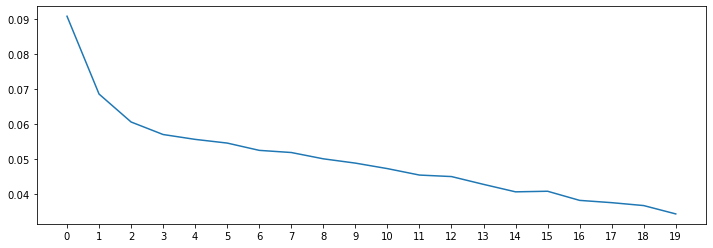

In [138]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [139]:
start_time = time.perf_counter()
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

end_time = time.perf_counter()
print("temps d'éxécution", end_time - start_time)

temps d'éxécution 56.28624889999992


In [140]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [141]:
lstm_predictions

array([[112.22122306],
       [103.74822268],
       [118.75131661],
       [147.03226471],
       [ 97.03654224],
       [135.73541278],
       [116.51750901],
       [118.06635955],
       [144.65970331],
       [ 95.37968585],
       [140.51095808],
       [133.44690913],
       [115.68930769],
       [117.94887522],
       [123.96150136],
       [134.85628301],
       [106.13548213],
       [130.6201067 ],
       [123.71809626],
       [123.42083687],
       [133.15242851],
       [111.10044056],
       [135.61817253],
       [123.24313962],
       [122.63865733],
       [124.06942898],
       [125.2033543 ],
       [127.83564919],
       [116.50992686],
       [127.9088735 ],
       [123.1609031 ],
       [123.23294455],
       [127.25128168],
       [118.45595354],
       [130.55434251],
       [120.07730865],
       [122.88104856],
       [124.95327139],
       [123.79215294],
       [123.98871326],
       [120.80264235],
       [125.10271782],
       [121.90982515],
       [122

In [115]:
listLSTM = lstm_predictions.tolist()

In [116]:
listLSTM2 = []
for i in listLSTM:
    listLSTM2.append(i[0])

In [117]:
listLSTM2

[48.35855197906494,
 77.51969242095947,
 132.62987279891968,
 98.76840829849243,
 98.44859218597412,
 157.39587497711182,
 24.90950322151184,
 85.16704940795898,
 126.57958936691284,
 134.29390144348145,
 125.38398313522339,
 108.43617486953735,
 130.05343437194824,
 143.84142303466797,
 27.74289894104004,
 123.15940713882446,
 141.83271551132202,
 130.68117809295654,
 115.57199716567993,
 154.27094221115112,
 20.370534896850586,
 83.25598335266113,
 100.80089282989502,
 105.75837707519531,
 107.30553865432739,
 105.00487184524536,
 123.27539682388306,
 23.43246078491211,
 78.2471284866333,
 89.68441772460938,
 111.9463324546814,
 104.20291328430176,
 109.34267330169678,
 140.53866720199585,
 109.1133041381836,
 66.42037558555603,
 77.71257901191711,
 114.00194692611694,
 122.1866774559021,
 110.02222633361816,
 134.84895420074463,
 137.39043998718262,
 34.68780326843262,
 108.83011865615845,
 106.04698038101196,
 115.44482088088989,
 131.55108976364136,
 135.9682173728943,
 143.752028

In [118]:
listTest = []
for i in test:
    listTest.append(i[0])

In [119]:
prevision = {
  "Test": listTest,
  "Lstm Result" : listLSTM2,
}
timeSeriesPrev = pd.DataFrame(prevision)

In [120]:
timeSeriesPrev.head(50)

,Test,Lstm Result
0,86,48.358552
1,145,77.519692
2,151,132.629873
3,107,98.768408
4,86,98.448592
5,179,157.395875
6,0,24.909503
7,85,85.167049
8,150,126.579589
9,148,134.293901


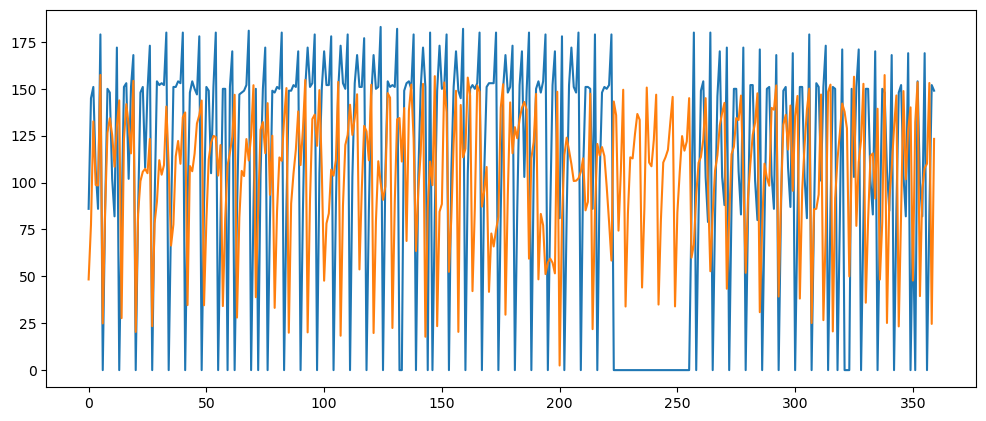

In [121]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(timeSeriesPrev)

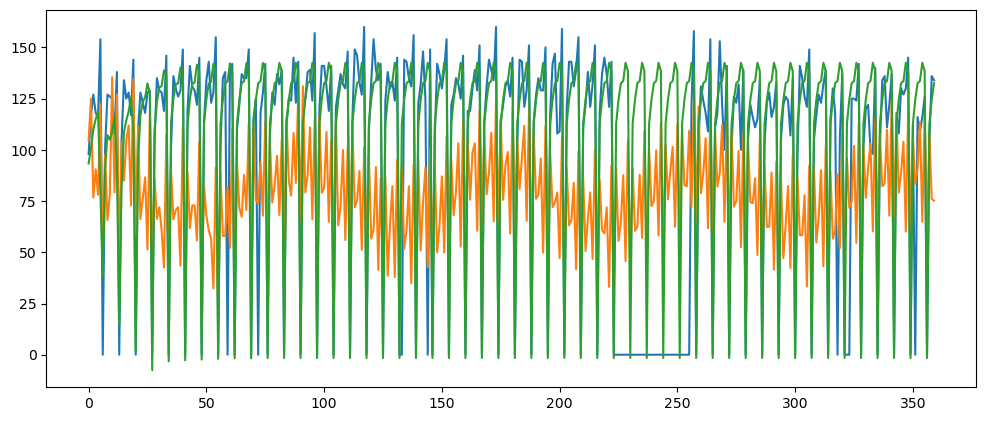

In [220]:
plt.figure(figsize=(12,5), dpi=100)
sah = pd.read_excel('ResultTimeSeriesPrev2.xlsx')
plt.plot(sah)